In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date

In [12]:
df = get_history(symbol= 'SBIN', 
                        start = date(2019,2,21), 
                        end = date(2019,5,21))
df = df.reset_index()

In [13]:
prices = df['Close'].tolist()
dates = df.index.tolist()
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1)).ravel()

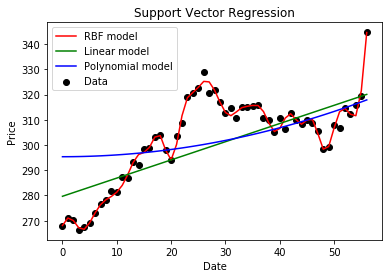

In [14]:
svr_lin = SVR(kernel= 'linear', C=1e3)
svr_poly = SVR(kernel= 'poly', C=1e3, degree = 2)
svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
svr_lin.fit(dates, prices)
svr_poly.fit(dates, prices)
svr_rbf.fit(dates, prices)
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [15]:
xtest = []
for i in range(int(dates[-1]) + 1, int(dates[-1])+7):
    xtest.append(i)
xtest=np.reshape(xtest, (len(xtest), 1))
type(xtest)

numpy.ndarray

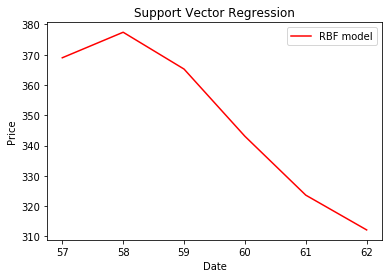

In [16]:
plt.plot(xtest, svr_rbf.predict(xtest), color='red', label='RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()